In [ ]:
# Training Neural Network from Scratch
using LinearAlgebra, Plots, Flux
using Flux.Optimise: update!

In [ ]:
# Generate data for training

iter = 200

# Output
y = zeros(iter)
yd = zeros(iter)

#Inputs
x1 = 2*rand(iter) .- 1

f(x1) = x1^2 + (sin(10*x1))

for i = 1:iter
    y[i] = f(x1[i])       # y is the input for calculation of next state
    yd[i] = y[i]                                      # Output of System for ith instant inputs
end

fig1 = plot()
display(scatter!(fig1, x1, yd))

In [20]:
## Initializing the weights and other parametrs of the NN

n0 = 1            # No of inputs/input neurons
n1 = 40          # no. of Neurons in the first layer
n2 = 40           # No. of Neurons in the second layer
n3 = 1            # No. of Outputs

predictNN = Chain(Dense(n0, n1),
			  Dense(n1, n2),
			  Dense(n2, n3))

# predictNN([1])[1]
# opt = Flux.Optimise.Descent()
# p = Flux.params(predictNN)
# function loss(x, y)
#     return sum((predictNN([x])[1] .- y).^2) 
# end
# grads = gradient(()->loss(x1[1], yd[1]), p)
# Flux.Optimise.update!(opt, p, grads)

Chain(
  Dense(1, 40),                         # 80 parameters
  Dense(40, 40),                        # 1_640 parameters
  Dense(40, 1),                         # 41 parameters
)                   # Total: 6 arrays, 1_761 parameters, 7.254 KiB.

In [ ]:
# Training the network
lr = 0.001      # learning rate
epoch = 1000    # no. of epochs
p = 1          # p is the index of each epoch

y_act = zeros(iter)

mse1 =  zeros(epoch)
mse = 0

function loss(x, y)
    return sum((predictNN([x])[1] .- y).^2) 
end

opt = Flux.Optimise.Descent(lr)

pN = Flux.params(predictNN)

while ( p <= epoch )
    for j = 1:iter   # j is the index of each pattern


        grads = gradient(()->loss(x1[j], yd[j]), pN)
        
        # Calculation of dels and weight update by backpropogation
        Flux.Optimise.update!(opt, pN, grads)

        #Storing values for plotting 
        y_act[j] = predictNN([x1[j]])[1]
        mse = mse + 0.5 * ( yd[j] - y_act[j] ) * ( yd[j] - y_act[j] ) / iter    #update of weights 
    end

    mse1[p] = mse
    global mse = 0
    global p=p+1
end

display(mse1[epoch])
fig2 = plot()
display(plot!(fig2, yd))
display(plot!(fig2, y_act))


fig3 = plot()
display(plot!(mse1))

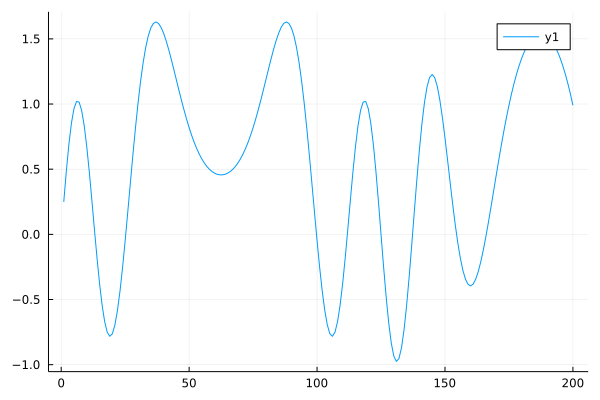

In [5]:
# plot actual test data

iter_t = 200                          # No. of test data set
y = zeros(iter_t)
yd = zeros(iter_t)
u = zeros(iter_t)

for i = 1:iter_t
    if i <= 500
        u[i] = sin( 2*pi*i/250)                     # Test Input Data
    else
        u[i] = 0.8*sin(2*pi*i/250) + 0.2*sin(2*pi*i/25)
    end

    y[i] = f(u[i])    # y is the input for calculation of next state
    yd[i] = y[i]                               # Output of System for ith instant inputs
end
x = zeros(1, iter_t)
for i = 1:iter_t                             # Storing inputs in x for convinience
    x[1,i] =  u[i]
end

fig4 = plot(yd[1:iter_t])

In [6]:
# Plot using Neural Network
y_act = zeros(iter_t)
y_act[1] = y[1]
e = zeros(iter_t)

for j=1:iter_t-1
    #Storing Values
    y_act[j] = predictNN(x[:,j])
    e[j] = ( y_act[j]-yd[j] ) * ( y_act[j]-yd[j] )
end

display(plot!(fig4, y_act[1:iter_t]))


# RMS Error
e1 = 0
for i=1:iter_t
    e1 = e1 + e[i]
end

rms_err = sqrt(e1/iter)

UndefVarError: UndefVarError: reLU not defined